<a href="https://colab.research.google.com/github/BimantaraDwiCahyo/PCVK_2024_07/blob/main/Week12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Nama : Bimantara Dwi Cahyo
* Kelas : 3E
* Absen : 07
* NIM : 2241720188

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Lakukan Face Detection untuk image object lain yang tersedia pada (/images/facedet).
Tampilkan seperti pada contoh berikut.

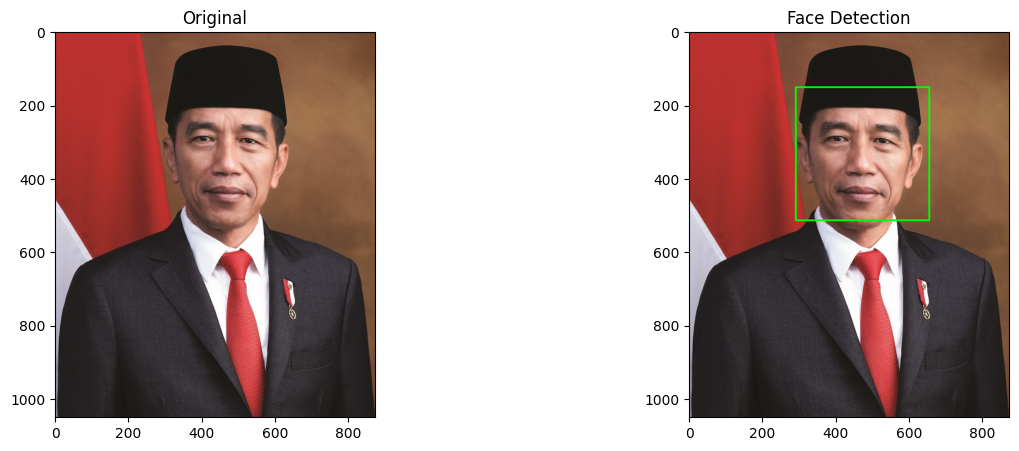

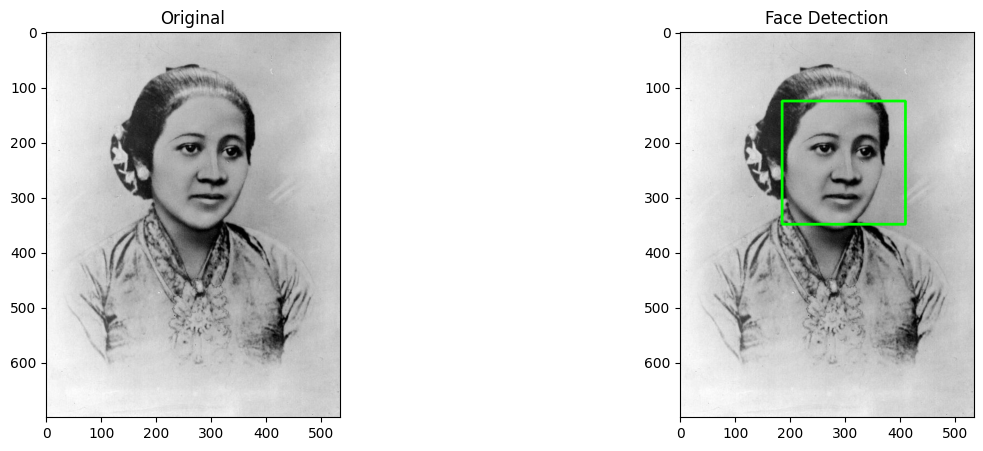

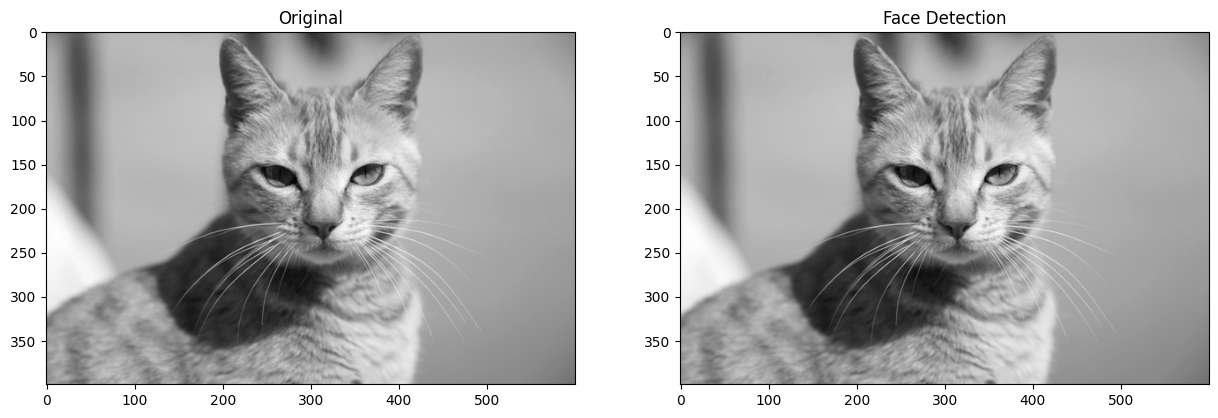

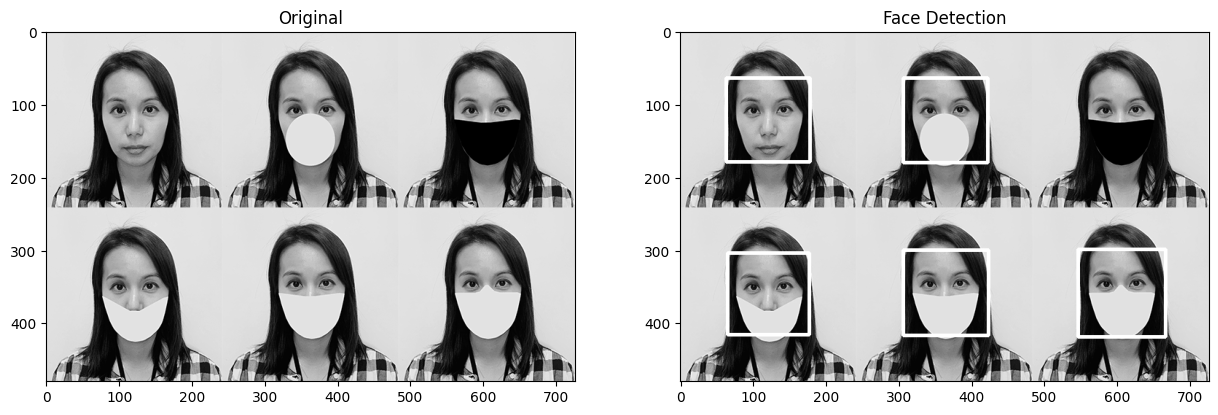

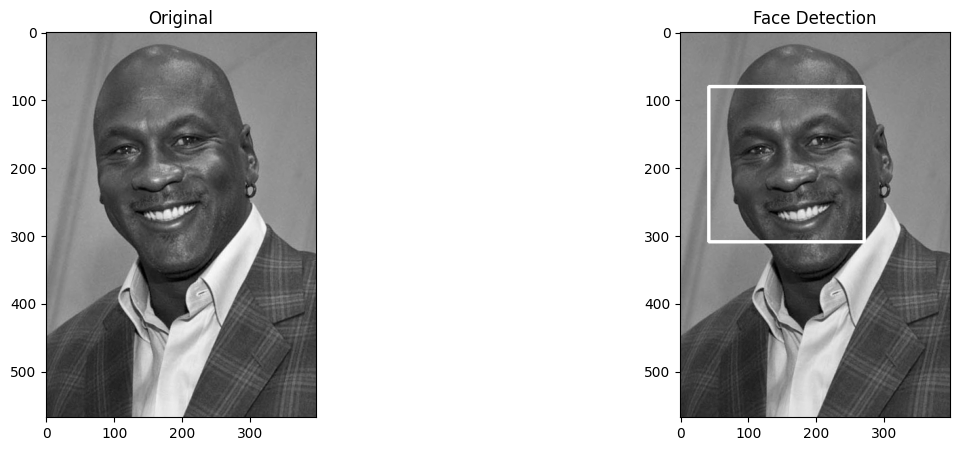

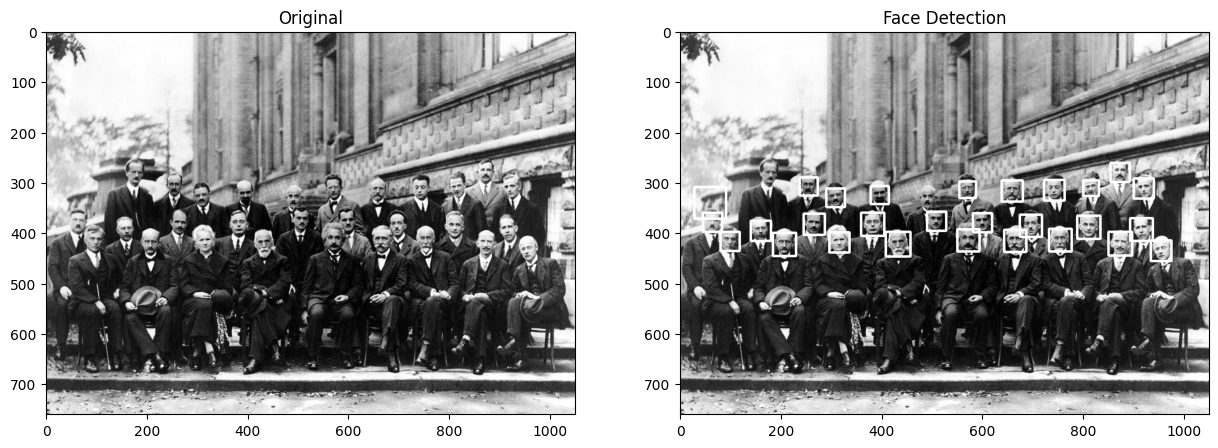

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt

# Fungsi untuk mendeteksi wajah dan menampilkan hasil
def detect_and_display(image_path, cascade, rectangle_color=(255, 0, 255), is_gray=False):
    # Membaca gambar
    image = cv.imread(image_path)
    image1 = image.copy()

    # Konversi ke grayscale jika diperlukan
    if is_gray:
        image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
        image1 = cv.cvtColor(image1, cv.COLOR_BGR2GRAY)

    # Deteksi wajah
    faces = cascade.detectMultiScale(image1)

    # Gambar persegi panjang di sekitar wajah
    for (x, y, w, h) in faces:
        cv.rectangle(image1, (x, y), (x + w, y + h), rectangle_color, 3)

    # Plot hasil
    f, axarr = plt.subplots(1, 2, figsize=(15, 5))
    if is_gray:
        axarr[0].imshow(image, cmap='gray')
        axarr[1].imshow(image1, cmap='gray')
    else:
        axarr[0].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
        axarr[1].imshow(cv.cvtColor(image1, cv.COLOR_BGR2RGB))
    axarr[0].set_title("Original")
    axarr[1].set_title("Face Detection")
    plt.show()

# Memuat classifier
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/PCVK/Week12/haarcascades/haarcascade_frontalface_alt.xml')

# File gambar
images = {
    "Jokowi": "/content/drive/MyDrive/PCVK/Week12/facedet/jokowi.jpg",
    "Kartini": "/content/drive/MyDrive/PCVK/Week12/facedet/kartini.jpg",
    "Kucing": "/content/drive/MyDrive/PCVK/Week12/facedet/mycat.jpg",
    "Maskeran": "/content/drive/MyDrive/PCVK/Week12/facedet/mask.png",
    "M. Jordan": "/content/drive/MyDrive/PCVK/Week12/facedet/mjordan.jpg",
    "Kelompok": "/content/drive/MyDrive/PCVK/Week12/facedet/solvayconf.jpg"
}

# Jalankan deteksi untuk setiap gambar
detect_and_display(images["Jokowi"], cascade_wajah, rectangle_color=(0, 255, 0))
detect_and_display(images["Kartini"], cascade_wajah, rectangle_color=(0, 255, 0))
detect_and_display(images["Kucing"], cascade_wajah, rectangle_color=(255, 0, 255), is_gray=True)
detect_and_display(images["Maskeran"], cascade_wajah, rectangle_color=(255, 0, 255), is_gray=True)
detect_and_display(images["M. Jordan"], cascade_wajah, rectangle_color=(255, 0, 255), is_gray=True)
detect_and_display(images["Kelompok"], cascade_wajah, rectangle_color=(255, 0, 255), is_gray=True)

Pada Soal No.2. wajah kucing tidak bisa dideteksi dengan baik. Lakukan deteksi wajah
kucing hingga muncul rectangle pada bagian wajahnya. Petunjuk pada soal ini,
perhatikan pretrained features yang telah disediakan OpenCV. Gunakan xml yang ada
jika memang telah disediakan. Jika belum ada, coba cari dengan searching melalui
search engines.

<Figure size 1000x1000 with 0 Axes>

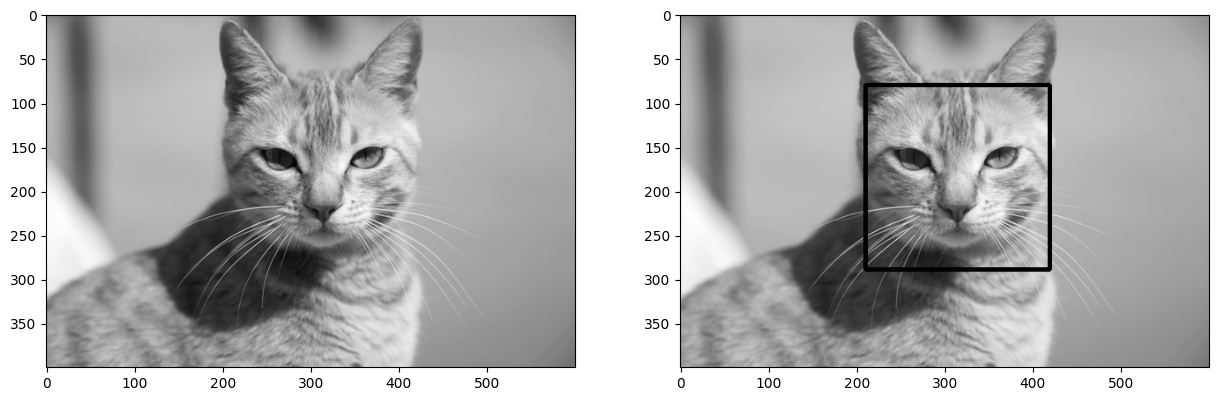

In [ ]:
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/PCVK/Week12/haarcascades/haarcascade_frontalcatface.xml')

kucing = cv.imread('/content/drive/MyDrive/PCVK/Week12/facedet/mycat.jpg',0)
kucing1 = cv.imread('/content/drive/MyDrive/PCVK/Week12/facedet/mycat.jpg',0)

roi_wajah = cascade_wajah.detectMultiScale(kucing1)
for (x,y,w,h) in roi_wajah:
  cv.rectangle(kucing1,(x,y),(x+w,y+h),(0,255,0),3)
plt.figure(figsize = (10,10))

f, axarr = plt. subplots(1,2,figsize=(15,5))
plt.subplot(121),plt.imshow(kucing, cmap='gray')
plt.subplot(122),plt.imshow(kucing1, cmap='gray')
plt.show()

4. Cobakan juga untuk eyes detection.

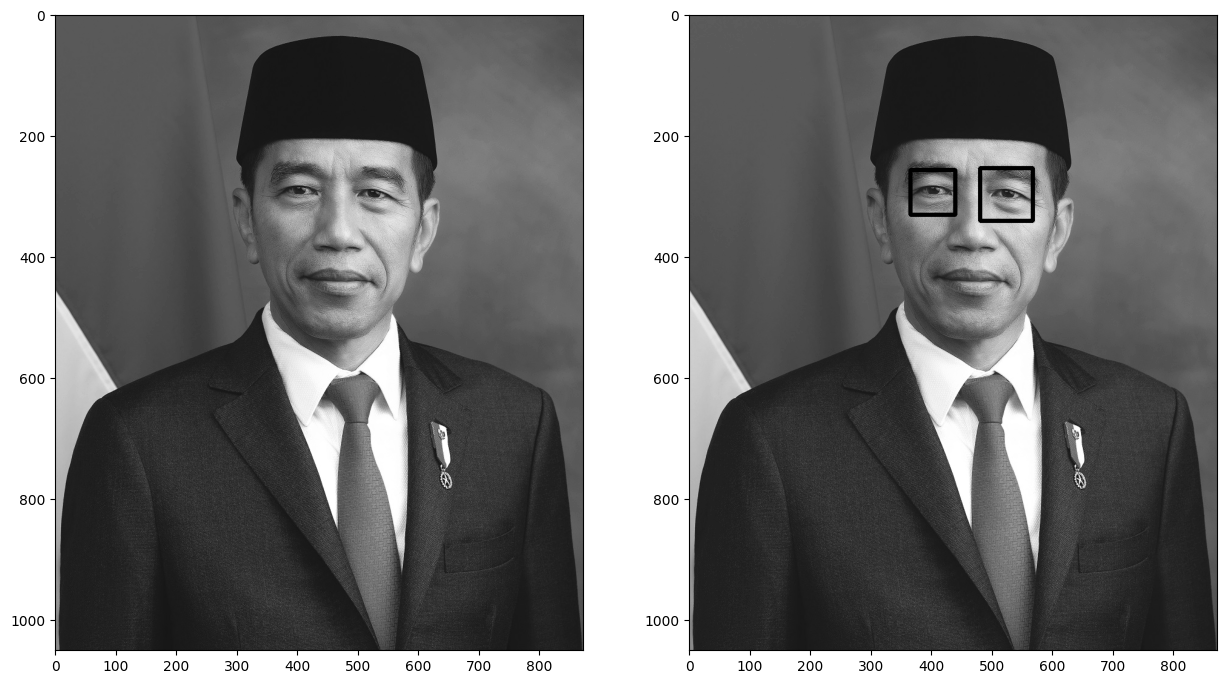

In [ ]:
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/PCVK/Week12/haarcascades/haarcascade_eye.xml')

jokowi = cv.imread('/content/drive/MyDrive/PCVK/Week12/facedet/jokowi.jpg')
jokowi_ori = cv.imread('/content/drive/MyDrive/PCVK/Week12/facedet/jokowi.jpg')
jokowi_gray = cv.cvtColor(jokowi, cv.COLOR_BGR2GRAY)
jokowi_ori_gray = cv.cvtColor(jokowi_ori, cv.COLOR_BGR2GRAY)

roi_wajah = cascade_wajah.detectMultiScale(jokowi_gray)
for (x,y,w,h) in roi_wajah:
  cv.rectangle(jokowi_gray,(x,y),(x+w,y+h),(0,0,0),5)

# Plot outputs
f, axarr = plt. subplots(1,2,figsize=(15,15))
plt.subplot(121),plt.imshow(jokowi_ori_gray, cmap='gray')
plt.subplot(122),plt.imshow(jokowi_gray, cmap='gray')
plt.show()

5. Lakukan Face Tracking menggunakan Google Colab. Petunjuk, Tutorial selengkapnya
tentang akses kamera dan FaceDetection pada google colab dapat dilihat di link
berikut: https://www.youtube.com/watch?v=YjWh7QvVH60

6. Lakukan Blurring pada bagian wajah yang terdeteksi. Berikut contoh keluarannya.
Petunjuk: anda dapat menggunakan cv.medianBlur untuk melakukan Blurring

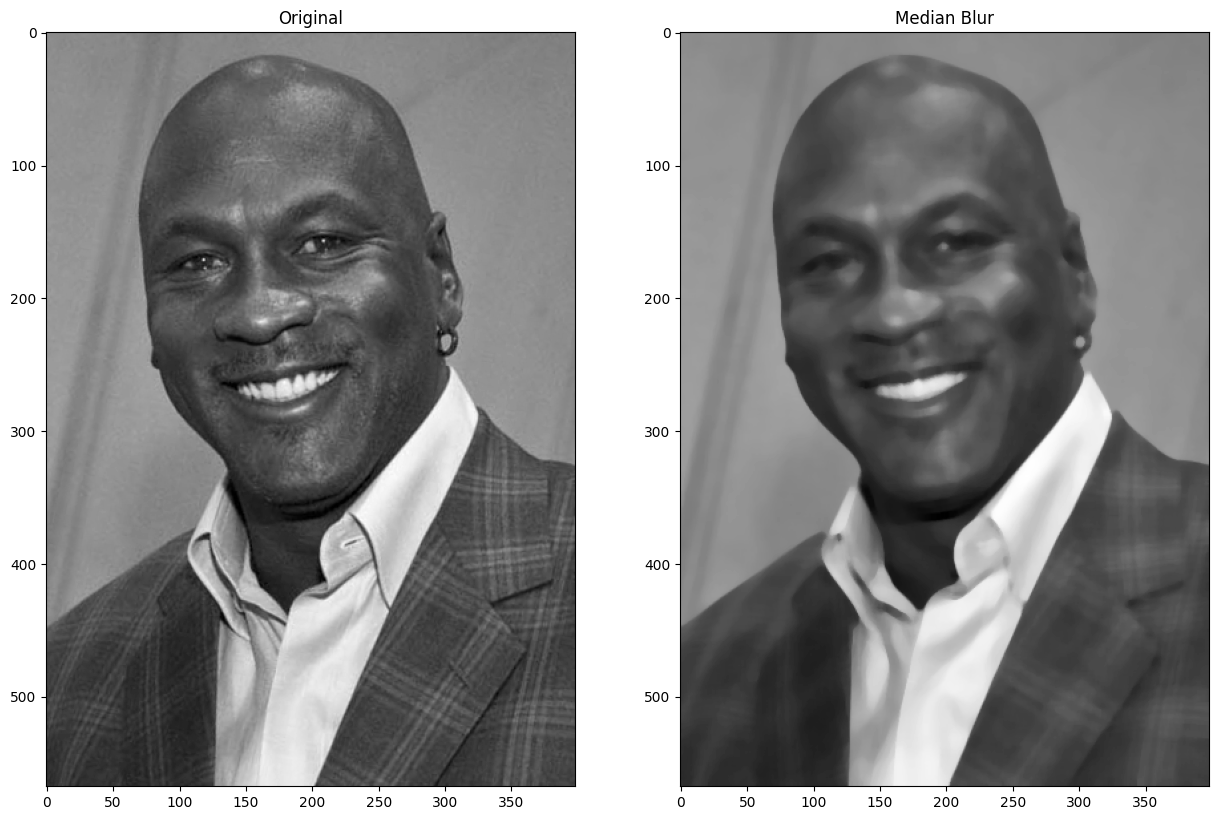

In [ ]:
mJordan = cv.imread('/content/drive/MyDrive/PCVK/Week12/facedet/mjordan.jpg')
mJordan_gray = cv.cvtColor(mJordan, cv.COLOR_BGR2GRAY)
figure_size = 9

output = cv.medianBlur(mJordan_gray, figure_size)
f, axarr = plt. subplots(1,2,figsize=(15,15))
plt.subplot(121), plt.imshow(mJordan_gray, cmap='gray'),plt.title('Original')
plt.subplot(122), plt.imshow(output, cmap='gray'),plt.title('Median Blur')
plt.show()

7. Lakukan segmentasi karakter pada KTP seperti gambar berikut

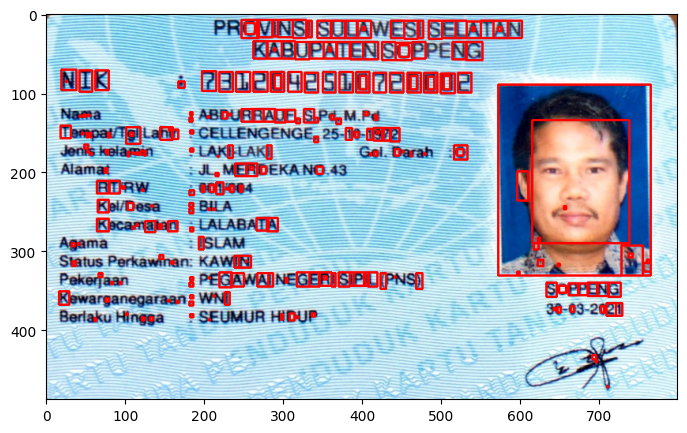

In [ ]:
import cv2

# Load the input image
ktp = cv2.imread('/content/drive/MyDrive/PCVK/Week12/KTP7.jpeg')

blurred = cv2.GaussianBlur(ktp, (5, 5), 0.5)

gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

erode = cv2.erode(bw.copy(), cv2.getStructuringElement(cv2.MORPH_OPEN, (1, 1)))

# Ekstraksi kontur
contours, hierarchy = cv2.findContours(erode.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 4 and w >= 1 and float(ras) <= 1:
      cv2.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)
    elif h >= 2 and w >= 1 and float(ras) <= 1:
      cv2.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)

plt.figure(figsize=(10,5))
plt.imshow(cv2.cvtColor(ktp, cv2.COLOR_BGR2RGB))


8. Lakukan cropping pada bagian NIK saja sehingga muncul hasil sebagai berikut

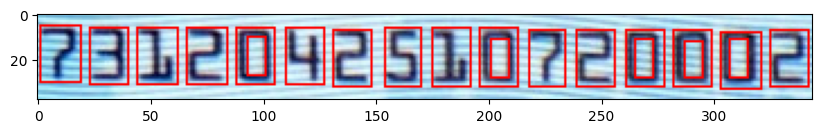

In [ ]:

# Load the input image
ktp = cv2.imread('/content/drive/MyDrive/PCVK/Week12/KTP7.jpeg')

blurred = cv2.GaussianBlur(ktp, (5, 5), 0.5)

gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

erode = cv2.erode(bw.copy(), cv2.getStructuringElement(cv2.MORPH_OPEN, (1, 1)))

# Ekstraksi kontur
contours, hierarchy = cv2.findContours(erode.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 4 and w >= 1 and float(ras) <= 1:
      cv2.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 2 and w >= 1 and float(ras) <= 1:
      cv2.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

cropped_img = ktp[67:105, 196:540]

plt.figure(figsize=(10,5))
plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))

9. Kita akan menggunakan Deep Learning untuk melakukan pengenalan karakter
Sebelum melakukan training data, terlebih dahulu disiapkan data yang akan dilakukan
training yaitu data image nomor angka 0-9. Untuk membuat data tersebut bisa
gunakan image editor untuk dilakukan croping satu persatu. Kemudian selanjutnya
gunakan source code di bawah ini untuk proses persiapan untuk training.

In [ ]:
# Mengimpor library yang diperlukan
import os
import pickle
import numpy as np
import tensorflow as tf
from keras.utils import to_categorical
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, ZeroPadding2D
from keras.models import Model
from keras.optimizers import Adam

# Memuat dataset MNIST
(X_train, y_train), (_, _) = tf.keras.datasets.mnist.load_data()

# Menentukan jumlah sampel per kelas
num_samples_per_class = 100

# Menentukan digit yang akan diekstrak
digits_to_extract = list(range(10))

# Fungsi untuk mengekstrak sampel dari dataset
def extract_samples(X, y, digits, num_samples):
    samples = []
    for digit in digits:
        digit_indices = np.where(y == digit)[0]
        selected_indices = np.random.choice(digit_indices, num_samples, replace=False)
        samples.extend([(X[i], digit) for i in selected_indices])
    return samples

# Mengekstrak sampel dari dataset pelatihan
training_data = extract_samples(X_train, y_train, digits_to_extract, num_samples_per_class)

# Mengacak urutan data pelatihan
np.random.shuffle(training_data)

# Memisahkan fitur dan label
X, Y = zip(*training_data)

# Mengubah bentuk fitur menjadi (-1, 28, 28, 1)
X = np.array(X).reshape(-1, 28, 28, 1)

# Menyimpan fitur ke file pickle
pickle_out = open("X_mnist.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

# Menyimpan label ke file pickle dalam bentuk one-hot encoding
pickle_out = open("Y_mnist.pickle", "wb")
pickle.dump(to_categorical(Y, num_classes=10), pickle_out)
pickle_out.close()

In [ ]:
# Mengimpor library yang diperlukan
from keras.models import load_model, Sequential
from keras.optimizers import Adam
from keras.utils import to_categorical

# Memuat fitur dan label dari file pickle
X_train = pickle.load(open("X_mnist.pickle", "rb"))
Y_train = pickle.load(open("Y_mnist.pickle", "rb"))

# Normalisasi fitur dengan membaginya dengan 255
X_train = X_train.astype('float32') / 255

# Fungsi untuk membuat model
def create_model():
    model = Sequential()
    # Menambahkan layer ZeroPadding2D
    model.add(ZeroPadding2D((1, 1), input_shape=(28, 28, 1)))
    # Menambahkan layer Conv2D dengan 64 filter dan fungsi aktivasi ReLU
    model.add(Conv2D(64, (3, 3), activation='relu'))
    # Menambahkan layer MaxPooling2D
    model.add(MaxPooling2D((2, 2)))
    # Menambahkan layer Conv2D dengan 128 filter dan fungsi aktivasi ReLU
    model.add(Conv2D(128, (3, 3), activation='relu'))
    # Menambahkan layer MaxPooling2D
    model.add(MaxPooling2D((2, 2)))
    # Menambahkan layer Flatten untuk meratakan output sebelum memasukkannya ke layer Dense
    model.add(Flatten())
    # Menambahkan layer Dense dengan 128 neuron dan fungsi aktivasi ReLU
    model.add(Dense(128, activation='relu'))
    # Menambahkan layer Dense dengan 10 neuron (untuk 10 kelas) dan fungsi aktivasi softmax
    model.add(Dense(10, activation='softmax'))
    return model

# Membuat model
model = create_model()

# Mengompilasi model dengan optimizer Adam, loss function categorical_crossentropy, dan metrik akurasi
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Melatih model dengan data pelatihan
model.fit(X_train, Y_train, epochs=10, batch_size=128)

# Menyimpan model ke file 'mnist_model.h5'
model.save('mnist_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/zero_padding2d.py:72: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 287ms/step - accuracy: 0.3207 - loss: 2.0706
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 432ms/step - accuracy: 0.7110 - loss: 0.9517
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 408ms/step - accuracy: 0.8356 - loss: 0.4751
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 275ms/step - accuracy: 0.9004 - loss: 0.3294
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 276ms/step - accuracy: 0.9222 - loss: 0.2574
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 262ms/step - accuracy: 0.9553 - loss: 0.1682
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 411ms/step - accuracy: 0.9574 - loss: 0.1313
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 276ms/step - accuracy: 0.9771 - loss: 0.1002
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 271ms/step - accuracy: 0.9873 - loss: 0.0601
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 263ms/step - accuracy: 0.9893 - loss: 0.0541


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9978 - loss: 0.0399
Accuracy on the test set: 99.70%


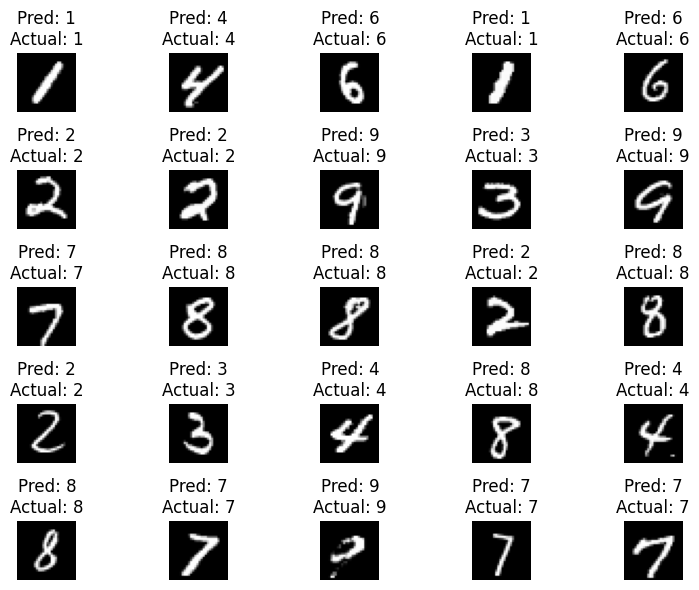

In [ ]:
# Mengimpor library yang diperlukan
from keras.utils import to_categorical

# Memuat fitur dan label dari file pickle
pickle_in = open("X_mnist.pickle", "rb")
X_test = pickle.load(pickle_in)
pickle_in = open("Y_mnist.pickle", "rb")
Y_test = pickle.load(pickle_in)

# Normalisasi fitur dengan membaginya dengan 255
X_test = X_test / 255.0

# Memuat model yang telah dilatih sebelumnya
model = tf.keras.models.load_model("mnist_model.h5")

# Melakukan prediksi pada data uji
predictions = model.predict(X_test)

# Menghitung akurasi model pada data uji
accuracy = model.evaluate(X_test, Y_test)[1]
print("Accuracy on the test set: {:.2f}%".format(accuracy * 100))

# Menampilkan hasil prediksi pada beberapa sampel data uji
num_results_to_display = 25
fig, axes = plt.subplots(5, 5, figsize=(8, 6))

for i in range(num_results_to_display):
    predicted_label = np.argmax(predictions[i])
    actual_label = np.argmax(Y_test[i])
    img = X_test[i].reshape((28, 28))
    axes[i // 5, i % 5].imshow(img, cmap='gray')
    axes[i // 5, i % 5].set_title(f'Pred: {predicted_label}\nActual: {actual_label}')
    axes[i // 5, i % 5].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
!pip install pytesseract
!sudo apt-get install tesseract-ocr-ind

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-ind tesseract-ocr-osd
0 upgraded, 4 newly installed, 0 to remove and 49 not upgraded.
Need to get 5,353 kB of archives.
After this operation, 16.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-ind all 1:4.00~git30-7274cfa-1.1 [537 kB]
Fetched 5,353 kB in 0s (16.6 MB/s)
debconf: unable to init

In [ ]:
# Mengimpor library yang diperlukan
import pytesseract
import imutils
import PIL

# Load the input image
ktp = cv2.imread('/content/drive/MyDrive/PCVK/Week12/KTP7.jpeg')

cropped_img = ktp[67:105, 196:545]

# Menggunakan gambar hasil cropping sebelumnya
img = cropped_img

# Mengubah gambar ke grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Melakukan thresholding pada gambar grayscale
_, threshed = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)

# Menggunakan pytesseract untuk mengenali teks pada gambar threshold
result = pytesseract.image_to_string(PIL.Image.fromarray(threshed), lang="ind")

# Menampilkan hasil pengenalan teks
print("NIK From e-KTP is :", result)

NIK From e-KTP is : 73120142510720002

